In [36]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [37]:
path = "../data/Train_knight.csv"
data_train= pd.read_csv(path)

In [38]:
encoder = LabelEncoder()
labels = encoder.fit_transform(data_train['knight'])

data_train['knight'] = labels
data_train.head()

,Sensitivity,Hability,Strength,Power,Agility,Dexterity,Awareness,Prescience,Reactivity,Midi-chlorien,...,Evade,Stims,Sprint,Combo,Delay,Attunement,Empowered,Burst,Grasping,knight
0,11.80,17.26,75.26,431.9,0.09087,0.06232,0.028530,0.016380,0.1847,0.06019,...,24.49,86.00,562.0,0.1244,0.17260,0.14490,0.05356,0.2779,0.08121,1
1,19.81,22.15,130.00,1260.0,0.09831,0.10270,0.147900,0.094980,0.1582,0.05395,...,30.88,186.80,2398.0,0.1512,0.31500,0.53720,0.23880,0.2768,0.07615,0
2,10.97,17.20,71.73,371.5,0.08915,0.11130,0.094570,0.036130,0.1489,0.06640,...,26.87,90.14,476.4,0.1391,0.40820,0.47790,0.15550,0.2540,0.09532,1
3,11.62,18.18,76.38,408.8,0.11750,0.14830,0.102000,0.055640,0.1957,0.07255,...,25.40,88.14,528.1,0.1780,0.28780,0.31860,0.14160,0.2660,0.09270,1
4,11.26,19.83,71.30,388.1,0.08511,0.04413,0.005067,0.005664,0.1637,0.06343,...,26.43,76.38,435.9,0.1108,0.07723,0.02533,0.02832,0.2557,0.07613,1


In [39]:
scaler = StandardScaler()
df_std = scaler.fit_transform(data_train)
df_std = pd.DataFrame(df_std, columns = data_train.columns)

In [40]:
pca = PCA()
pca.fit(df_std)
pca.explained_variance_ratio_

print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()
print("Cumulative Variances (Percentage):")
print(pca.explained_variance_ratio_.cumsum() * 100)

Variances (Percentage):
[4.48917596e+01 1.77912636e+01 9.67060568e+00 6.26842269e+00
 5.37204836e+00 3.73955136e+00 2.37591979e+00 1.82012117e+00
 1.38767075e+00 1.10970484e+00 1.02059677e+00 9.21235938e-01
 8.52230799e-01 7.13562872e-01 4.13084765e-01 3.04511906e-01
 2.71586688e-01 2.15161303e-01 1.85399684e-01 1.48042429e-01
 1.08631716e-01 1.04241449e-01 8.00248252e-02 7.60452896e-02
 5.50959514e-02 4.97445867e-02 2.57925354e-02 1.98906888e-02
 5.51592381e-03 2.16800508e-03 3.68038524e-04]

Cumulative Variances (Percentage):
[ 44.89175956  62.68302319  72.35362887  78.62205156  83.99409992
  87.73365129  90.10957108  91.92969224  93.317363    94.42706783
  95.44766461  96.36890054  97.22113134  97.93469422  98.34777898
  98.65229089  98.92387757  99.13903888  99.32443856  99.47248099
  99.58111271  99.68535416  99.76537898  99.84142427  99.89652022
  99.94626481  99.97205734  99.99194803  99.99746396  99.99963196
 100.        ]


In [43]:
num_components_90 = np.argmax((pca.explained_variance_ratio_.cumsum() * 100) >= 90) + 1
print(num_components_90)

7


Text(0, 0.5, 'Explained Variance (%)')

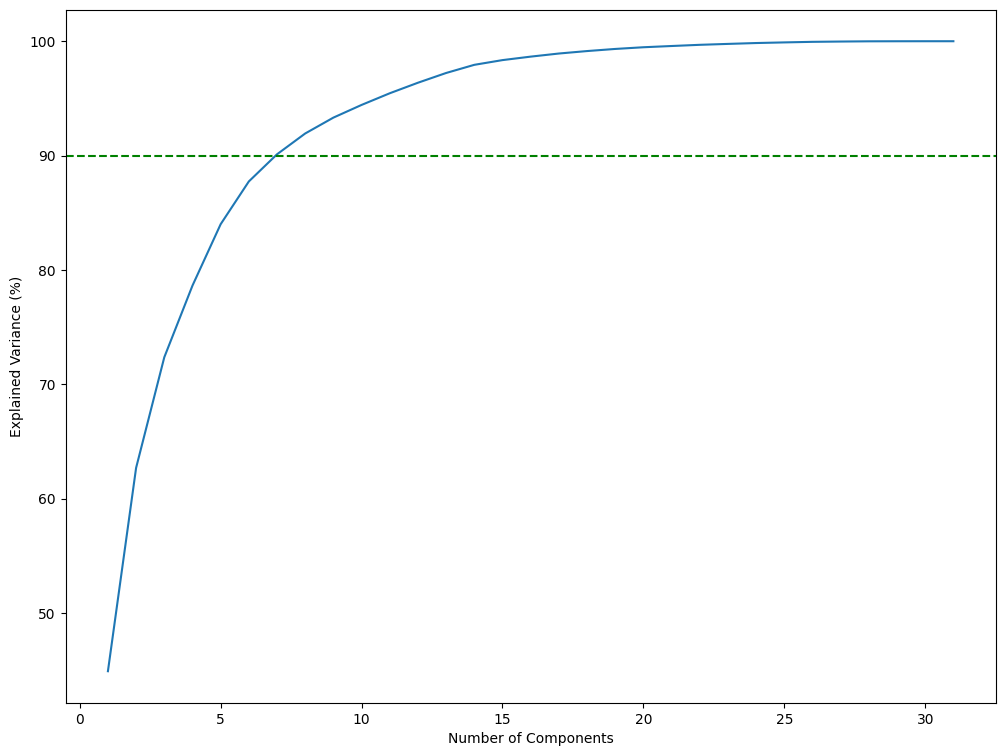

In [42]:
plt.figure(figsize = (12,9))
plt.plot(range(1, pca.explained_variance_ratio_.shape[0] + 1), pca.explained_variance_ratio_.cumsum() * 100)
plt.axhline(y = 90, color='green', linestyle='--')
# plt.axvline(x = num_components_90, color='red')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance (%)')